# Type 2 : Derived variable data 

### Data Preprocessing

In [1]:
from utils.preprocessing_withval import Makeloader, create_loaders, create_raw_loaders
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import random_split, DataLoader
import numpy as np
from sklearn.metrics import mean_squared_error
import joblib
import matplotlib.pyplot as plt



In [2]:
train_loader, val_loader = create_loaders(
    directories=[
        "/home/crois-times/timeseries/projects/tool_wear_havard/data/splitted_100ms/T1",
        "/home/crois-times/timeseries/projects/tool_wear_havard/data/splitted_100ms/T4",
    ],
    modalities=['Acc','Force','Acoustic'],
    batch_size=32,
    train_val_ratio=0.9,
)

xb, yb = next(iter(train_loader))
seq_len  = xb.shape[1]   # 84(12*7)
input_sz = xb.shape[-1]  # 보통 84 (Acc3+Force3+Acoustic1)
print(seq_len, input_sz)


84 84


In [3]:
test_loader = create_loaders(
    directories=[
        "/home/crois-times/timeseries/projects/tool_wear_havard/data/splitted_100ms/T5",
        "/home/crois-times/timeseries/projects/tool_wear_havard/data/splitted_100ms/T8",
    ],
    modalities=['Acc','Force','Acoustic'],  
    batch_size=32,
    train_val_ratio=None,
)

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
from model.regressor import *
from utils.train import train_model
from utils.test import evaluate_model
import numpy as np

In [6]:
# hyperparameter settings
input_size = input_sz  # Number of features
hidden_size = 128
num_layers = 2
output_size = 1
learning_rate = 0.001
batch_size = 32
epochs = 500

### LSTM

Epoch 1/200 | Train Loss: 43238.1133 | Val Loss: 36944.1362
Epoch 2/200 | Train Loss: 32352.0840 | Val Loss: 28525.3437
Epoch 3/200 | Train Loss: 25012.5053 | Val Loss: 22032.0707
Epoch 4/200 | Train Loss: 19294.7740 | Val Loss: 16941.8826
Epoch 5/200 | Train Loss: 14840.2015 | Val Loss: 12999.8269
Epoch 6/200 | Train Loss: 11410.5491 | Val Loss: 9992.2657
Epoch 7/200 | Train Loss: 8841.1210 | Val Loss: 7762.2739
Epoch 8/200 | Train Loss: 6966.9554 | Val Loss: 6165.0055
Epoch 9/200 | Train Loss: 5647.7142 | Val Loss: 5061.5106
Epoch 10/200 | Train Loss: 4762.8241 | Val Loss: 4315.6694
Epoch 11/200 | Train Loss: 3934.5069 | Val Loss: 3420.4382
Epoch 12/200 | Train Loss: 2994.8892 | Val Loss: 2595.5353
Epoch 13/200 | Train Loss: 2259.4175 | Val Loss: 1963.9986
Epoch 14/200 | Train Loss: 1710.4297 | Val Loss: 1491.7261
Epoch 15/200 | Train Loss: 1344.5189 | Val Loss: 1202.1421
Epoch 16/200 | Train Loss: 1073.2716 | Val Loss: 991.5968
Epoch 17/200 | Train Loss: 849.7373 | Val Loss: 786.008

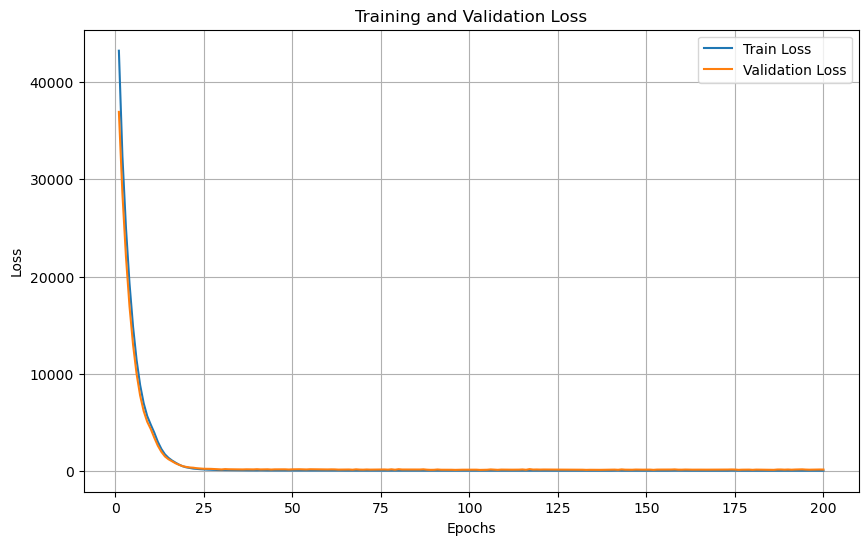

Train ended.


In [9]:
model = LSTMRegressor(input_size=input_sz,hidden_size= hidden_size, num_layers = num_layers, output_size = output_size).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, device, epochs=200)

print("Train ended.")


Evaluation Metrics:
RMSE: 20.4222
MAE : 17.4480
R²  : 0.8685
MAPE: 9.85%
Explained Var: 0.9016


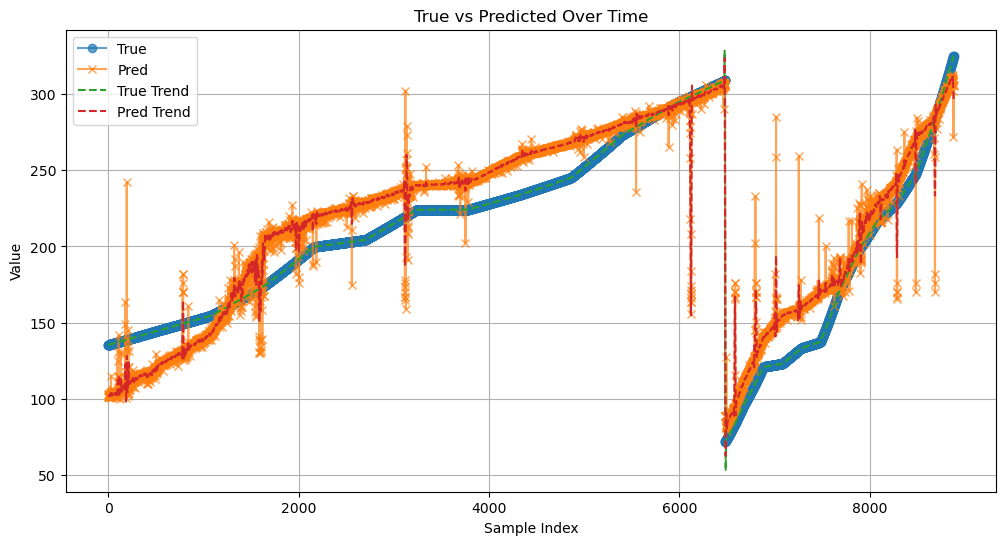

Test Metrics:
RMSE: 20.4222
MAE: 17.4480
R² Score: 0.8685
MAPE: 9.85%
Explained Variance Score: 0.9016


In [10]:
# Evaluate the model and visualize
from utils.test import evaluate_model
metrics, all_preds, all_labels = evaluate_model(model, test_loader, device)

print(f"Test Metrics:")
print(f"RMSE: {metrics['RMSE']:.4f}")
print(f"MAE: {metrics['MAE']:.4f}")
print(f"R² Score: {metrics['R2 Score']:.4f}")
print(f"MAPE: {metrics['MAPE']:.2f}%")
print(f"Explained Variance Score: {metrics['Explained Variance Score']:.4f}")

### GRU

Epoch 1/200 | Train Loss: 41269.8603 | Val Loss: 33950.2141
Epoch 2/200 | Train Loss: 28606.9854 | Val Loss: 24170.6401
Epoch 3/200 | Train Loss: 20358.0222 | Val Loss: 17145.0038
Epoch 4/200 | Train Loss: 14438.6691 | Val Loss: 12143.2539
Epoch 5/200 | Train Loss: 10288.0378 | Val Loss: 8685.6334
Epoch 6/200 | Train Loss: 7485.6954 | Val Loss: 6410.2356
Epoch 7/200 | Train Loss: 5696.0048 | Val Loss: 4990.7890
Epoch 8/200 | Train Loss: 4624.6735 | Val Loss: 4170.9454
Epoch 9/200 | Train Loss: 4028.0838 | Val Loss: 3723.9177
Epoch 10/200 | Train Loss: 3712.9333 | Val Loss: 3495.8538
Epoch 11/200 | Train Loss: 3491.2456 | Val Loss: 3074.6612
Epoch 12/200 | Train Loss: 2585.4636 | Val Loss: 2022.2593
Epoch 13/200 | Train Loss: 1667.9467 | Val Loss: 1403.4147
Epoch 14/200 | Train Loss: 1186.7108 | Val Loss: 1076.5160
Epoch 15/200 | Train Loss: 918.4466 | Val Loss: 857.6804
Epoch 16/200 | Train Loss: 685.8355 | Val Loss: 669.6145
Epoch 17/200 | Train Loss: 513.4879 | Val Loss: 535.4056
Epo

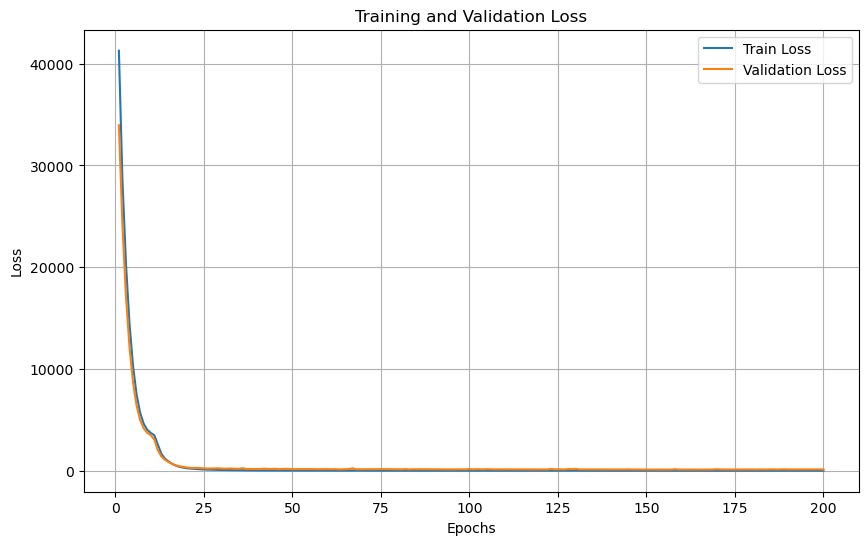

Train ended.


In [11]:
model = GRURegressor(input_size=input_sz,hidden_size= hidden_size, num_layers = num_layers, output_size = output_size).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, device, epochs=200)

print("Train ended.")


Evaluation Metrics:
RMSE: 19.6196
MAE : 17.1019
R²  : 0.8787
MAPE: 9.61%
Explained Var: 0.9131


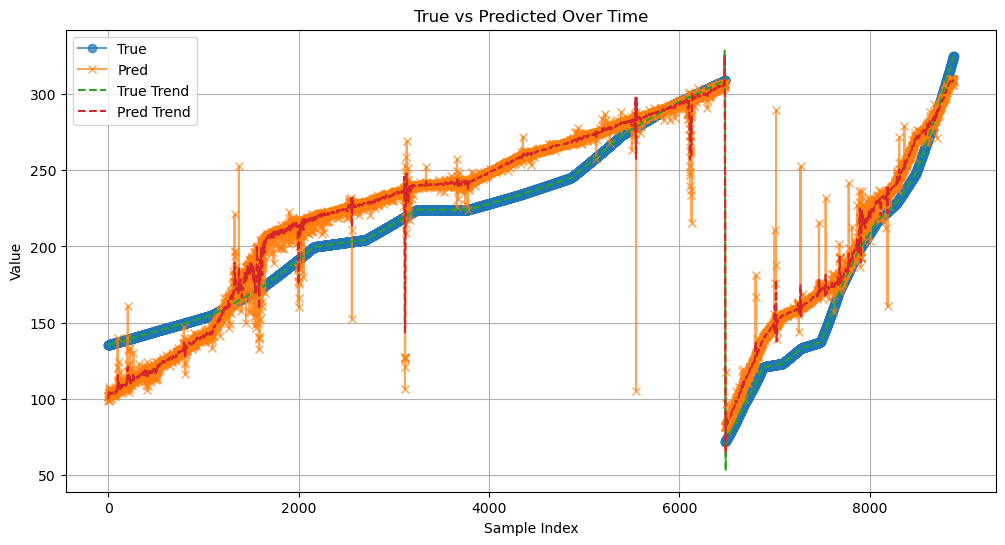

Test Metrics:
RMSE: 19.6196
MAE: 17.1019
R² Score: 0.8787
MAPE: 9.61%
Explained Variance Score: 0.9131


In [12]:
# Evaluate the model and visualize
from utils.test import evaluate_model
metrics, all_preds, all_labels = evaluate_model(model, test_loader, device)

print(f"Test Metrics:")
print(f"RMSE: {metrics['RMSE']:.4f}")
print(f"MAE: {metrics['MAE']:.4f}")
print(f"R² Score: {metrics['R2 Score']:.4f}")
print(f"MAPE: {metrics['MAPE']:.2f}%")
print(f"Explained Variance Score: {metrics['Explained Variance Score']:.4f}")

### BiLSTM

In [7]:
model = BiLSTMRegressor(input_size=input_sz,hidden_size= hidden_size, num_layers = num_layers, output_size = output_size).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, device, epochs=200)

print("Train ended.")


RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


Evaluation Metrics:
RMSE: 22.0902
MAE : 18.3001
R²  : 0.8462
MAPE: 10.34%
Explained Var: 0.8731


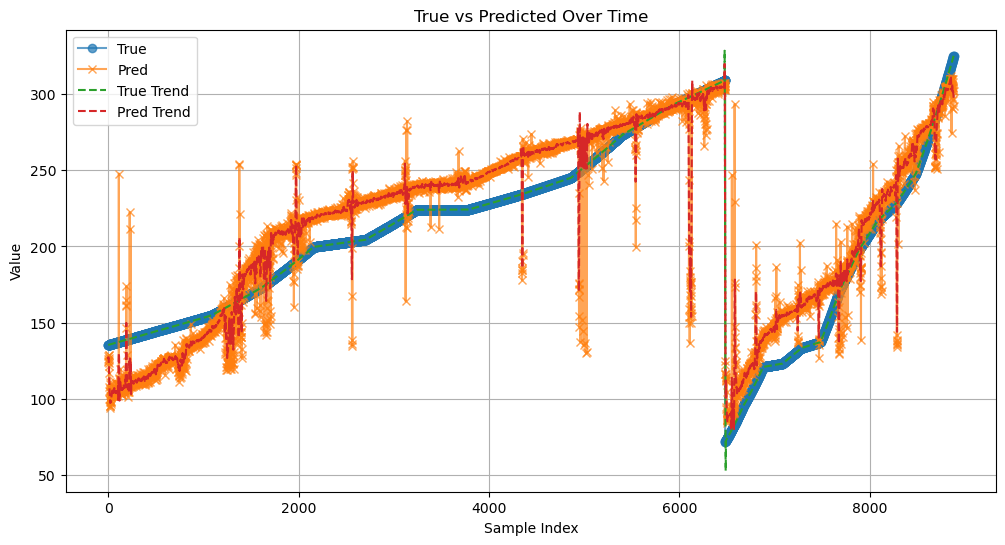

Test Metrics:
RMSE: 22.0902
MAE: 18.3001
R² Score: 0.8462
MAPE: 10.34%
Explained Variance Score: 0.8731


In [13]:
# Evaluate the model and visualize
from utils.test import evaluate_model
metrics, all_preds, all_labels = evaluate_model(model, test_loader, device)

print(f"Test Metrics:")
print(f"RMSE: {metrics['RMSE']:.4f}")
print(f"MAE: {metrics['MAE']:.4f}")
print(f"R² Score: {metrics['R2 Score']:.4f}")
print(f"MAPE: {metrics['MAPE']:.2f}%")
print(f"Explained Variance Score: {metrics['Explained Variance Score']:.4f}")

### Transformer ver2

In [8]:
model = TransformerRegressor(input_size=input_sz,hidden_size= hidden_size, num_layers = num_layers, output_size = output_size).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, device, epochs=200)

print("Train ended.")


NameError: name 'hidden_size' is not defined

Evaluation Metrics:
RMSE: 25.4224
MAE : 21.2343
R²  : 0.7963
MAPE: 11.75%
Explained Var: 0.8477


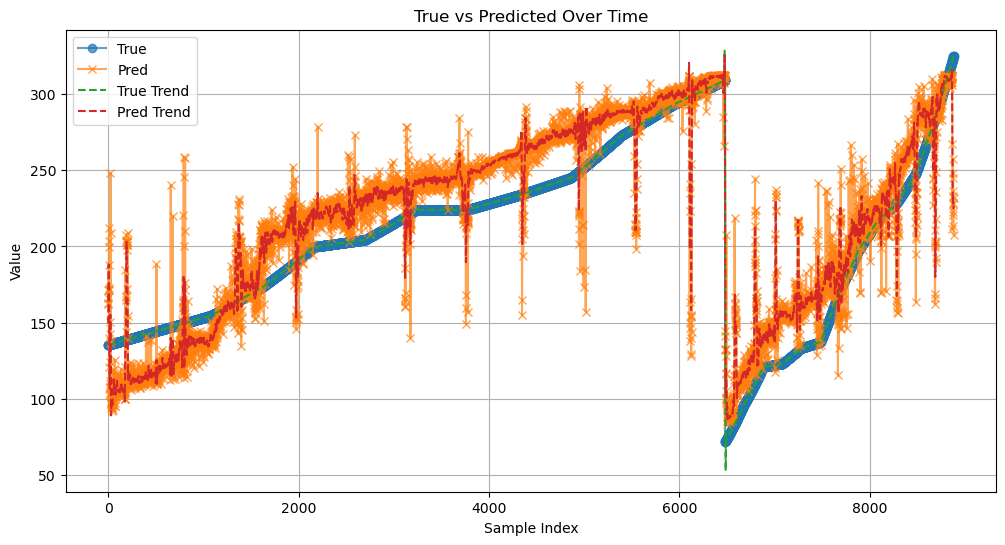

Test Metrics:
RMSE: 25.4224
MAE: 21.2343
R² Score: 0.7963
MAPE: 11.75%
Explained Variance Score: 0.8477


In [16]:
# Evaluate the model and visualize
from utils.test import evaluate_model
metrics, all_preds, all_labels = evaluate_model(model, test_loader, device)

print(f"Test Metrics:")
print(f"RMSE: {metrics['RMSE']:.4f}")
print(f"MAE: {metrics['MAE']:.4f}")
print(f"R² Score: {metrics['R2 Score']:.4f}")
print(f"MAPE: {metrics['MAPE']:.2f}%")
print(f"Explained Variance Score: {metrics['Explained Variance Score']:.4f}")

# Dummy

### Regression models

In [6]:
# hyperparameter settings
input_size = next(iter(train_loader))[0].shape[1]  # Number of features
hidden_size = 128
num_layers = 2
output_size = 1
learning_rate = 0.001
batch_size = 32
epochs = 500

Epoch 1/200 | Train Loss: 47152.8284 | Val Loss: 41836.9515
Epoch 2/200 | Train Loss: 39666.7395 | Val Loss: 36301.8352
Epoch 3/200 | Train Loss: 34700.4376 | Val Loss: 31848.8816
Epoch 4/200 | Train Loss: 30515.8950 | Val Loss: 27993.6776
Epoch 5/200 | Train Loss: 26846.3830 | Val Loss: 24593.2850
Epoch 6/200 | Train Loss: 23608.5722 | Val Loss: 21584.9775
Epoch 7/200 | Train Loss: 20741.3559 | Val Loss: 18926.9148
Epoch 8/200 | Train Loss: 18198.7993 | Val Loss: 16577.0532
Epoch 9/200 | Train Loss: 15954.0933 | Val Loss: 14510.5908
Epoch 10/200 | Train Loss: 13980.8619 | Val Loss: 12696.4606
Epoch 11/200 | Train Loss: 12255.4595 | Val Loss: 11120.4651
Epoch 12/200 | Train Loss: 10756.5567 | Val Loss: 9756.8847
Epoch 13/200 | Train Loss: 9460.6876 | Val Loss: 8586.1354
Epoch 14/200 | Train Loss: 8348.9354 | Val Loss: 7589.6993
Epoch 15/200 | Train Loss: 7403.5222 | Val Loss: 6748.5907
Epoch 16/200 | Train Loss: 6605.0325 | Val Loss: 6037.3474
Epoch 17/200 | Train Loss: 5907.5181 | Val

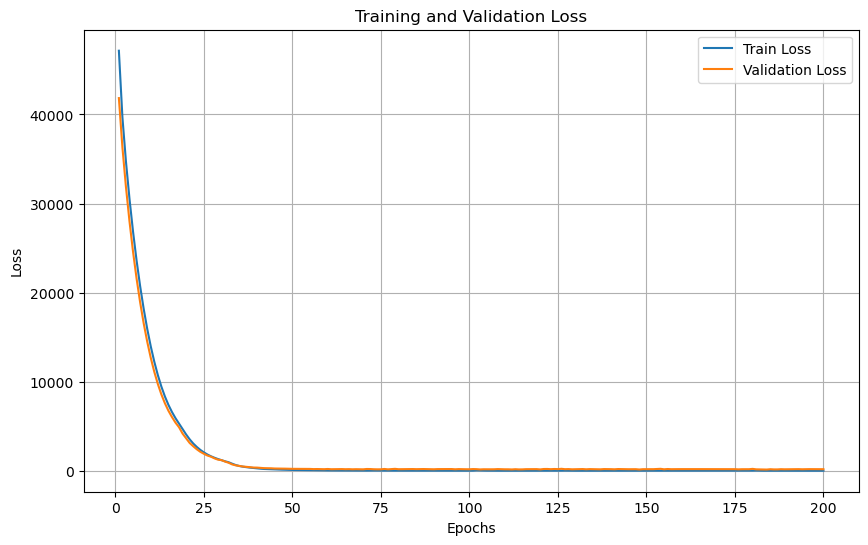

Train ended.


In [7]:
model = LSTMRegressor(input_size=input_size,hidden_size= hidden_size, num_layers = num_layers, output_size = output_size).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, device, epochs=200)

print("Train ended.")


In [10]:
train_loader_real = create_loaders(
    directories=[
        "/home/crois-times/timeseries/projects/tool_wear_havard/data/splitted_100ms/T1",
        "/home/crois-times/timeseries/projects/tool_wear_havard/data/splitted_100ms/T4",
    ],
    modalities=['Acc','Force','Acoustic'],  
    batch_size=64,
    train_val_ratio=None,
)

In [13]:
test_loader = create_loaders(
    directories=[
        "/home/crois-times/timeseries/projects/tool_wear_havard/data/splitted_100ms/T5",
        "/home/crois-times/timeseries/projects/tool_wear_havard/data/splitted_100ms/T8",
    ],
    modalities=['Acc','Force','Acoustic'],  
    batch_size=64,
    train_val_ratio=None,
)

Evaluation Metrics:
RMSE: 5.9933
MAE: 1.3749
R² Score: 0.9897
MAPE: 0.75%
Explained Variance Score: 0.9897


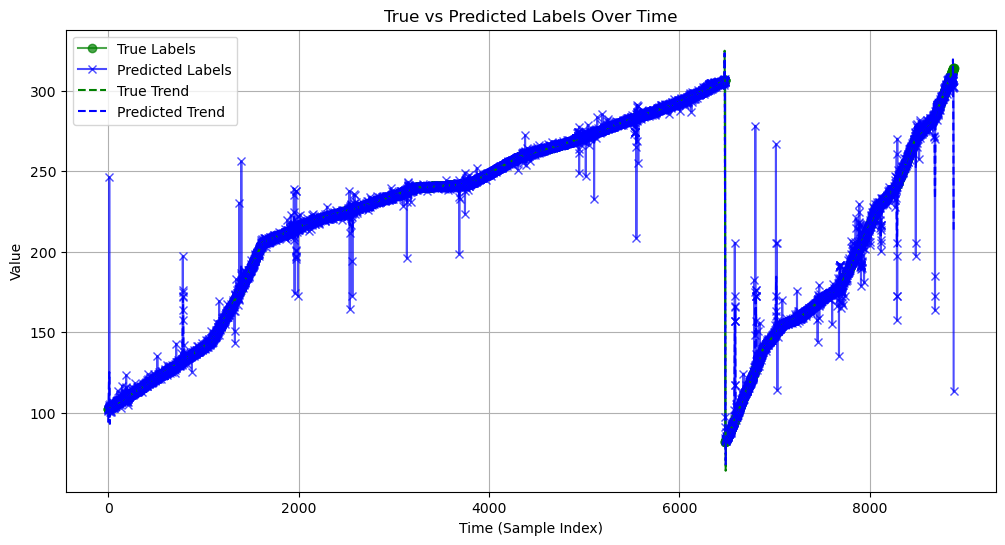

Test Metrics:
RMSE: 5.9933
MAE: 1.3749
R² Score: 0.9897
MAPE: 0.75%
Explained Variance Score: 0.9897


In [11]:
# Evaluate the model and visualize
metrics, all_preds, all_labels = evaluate_model(model, train_loader_real, device)

print(f"Test Metrics:")
print(f"RMSE: {metrics['RMSE']:.4f}")
print(f"MAE: {metrics['MAE']:.4f}")
print(f"R² Score: {metrics['R2 Score']:.4f}")
print(f"MAPE: {metrics['MAPE']:.2f}%")
print(f"Explained Variance Score: {metrics['Explained Variance Score']:.4f}")

Evaluation Metrics:
RMSE: 20.0095
MAE: 17.3108
R² Score: 0.8738
MAPE: 9.77%
Explained Variance Score: 0.9083


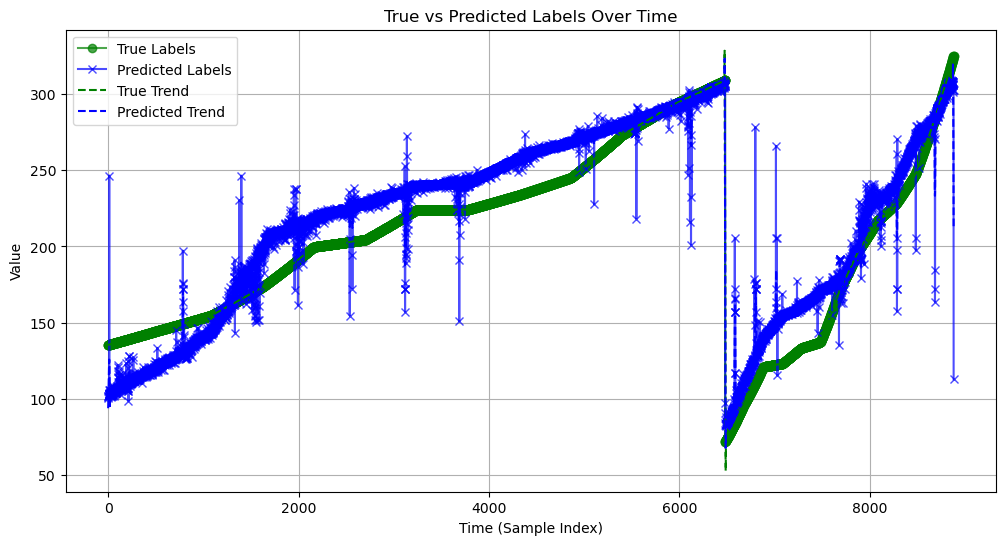

Test Metrics:
RMSE: 20.0095
MAE: 17.3108
R² Score: 0.8738
MAPE: 9.77%
Explained Variance Score: 0.9083


In [14]:
# Evaluate the model and visualize
metrics, all_preds, all_labels = evaluate_model(model, test_loader, device)

print(f"Test Metrics:")
print(f"RMSE: {metrics['RMSE']:.4f}")
print(f"MAE: {metrics['MAE']:.4f}")
print(f"R² Score: {metrics['R2 Score']:.4f}")
print(f"MAPE: {metrics['MAPE']:.2f}%")
print(f"Explained Variance Score: {metrics['Explained Variance Score']:.4f}")

Evaluation Metrics:
RMSE: 3.8461
MAE: 1.0357
R² Score: 0.9958
MAPE: 0.55%
Explained Variance Score: 0.9958


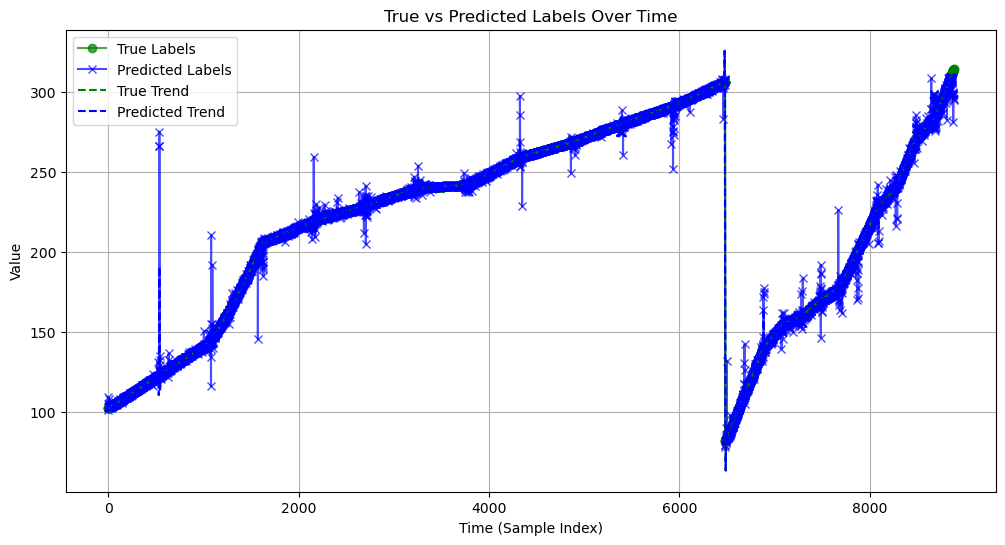

Test Metrics:
RMSE: 3.8461
MAE: 1.0357
R² Score: 0.9958
MAPE: 0.55%
Explained Variance Score: 0.9958


In [10]:
# Evaluate the model and visualize
metrics, all_preds, all_labels = evaluate_model(model, train_loader_real, device)

print(f"Test Metrics:")
print(f"RMSE: {metrics['RMSE']:.4f}")
print(f"MAE: {metrics['MAE']:.4f}")
print(f"R² Score: {metrics['R2 Score']:.4f}")
print(f"MAPE: {metrics['MAPE']:.2f}%")
print(f"Explained Variance Score: {metrics['Explained Variance Score']:.4f}")

Evaluation Metrics:
RMSE: 19.5617
MAE: 17.1178
R² Score: 0.8794
MAPE: 9.60%
Explained Variance Score: 0.9133


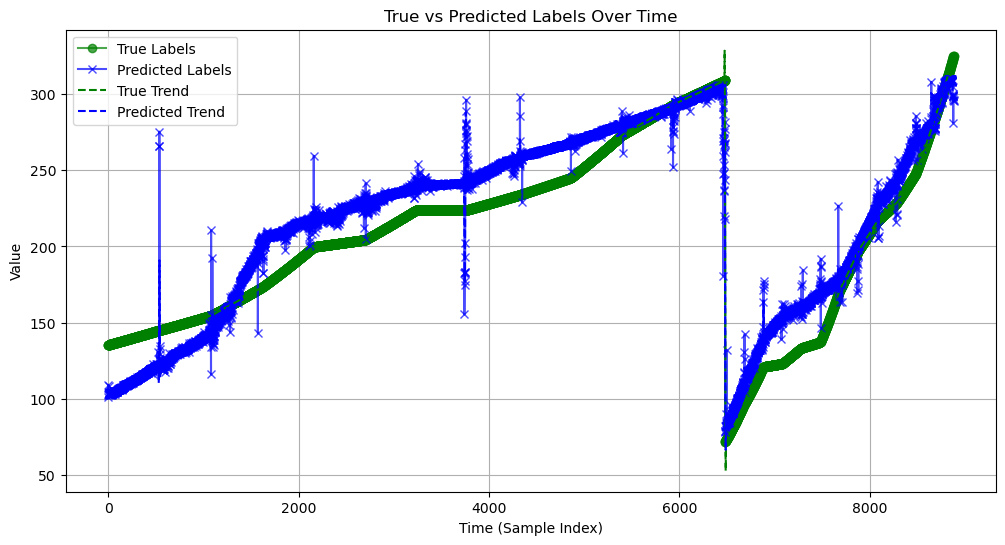

Test Metrics:
RMSE: 19.5617
MAE: 17.1178
R² Score: 0.8794
MAPE: 9.60%
Explained Variance Score: 0.9133


In [11]:
# Evaluate the model and visualize
metrics, all_preds, all_labels = evaluate_model(model, test_loader, device)

print(f"Test Metrics:")
print(f"RMSE: {metrics['RMSE']:.4f}")
print(f"MAE: {metrics['MAE']:.4f}")
print(f"R² Score: {metrics['R2 Score']:.4f}")
print(f"MAPE: {metrics['MAPE']:.2f}%")
print(f"Explained Variance Score: {metrics['Explained Variance Score']:.4f}")

In [13]:
# 저장할 경로
save_path = "./model_weights/best_regression_T1.pth"

# 모델 저장
torch.save(model.state_dict(), save_path)
print(f"✅ 모델이 저장되었습니다: {save_path}")


✅ 모델이 저장되었습니다: ./model_weights/best_regression_T1.pth


In [14]:
# 모델 초기화
model2 = LSTMRegressor(input_size=input_size,hidden_size= hidden_size, num_layers = num_layers, output_size = output_size).to(device)
save_path = "./model_weights/best_regression_T1.pth"
# 저장된 파라미터 불러오기
model2.load_state_dict(torch.load(save_path))
model2.eval()  # 평가 모드로 설정
print("✅ 저장된 모델을 불러왔습니다.")


✅ 저장된 모델을 불러왔습니다.


In [16]:
print(len(all_preds))

8880


In [15]:
import pandas as pd

# 회귀 모델 예측값을 저장할 DataFrame 생성
df_regression_predictions = pd.DataFrame({
    "Regression_Output": all_preds,  # 회귀 모델 예측값
    "True_Labels": all_labels        # 실제 값도 같이 저장 (비교용)
})

# CSV 파일로 저장
df_regression_predictions.to_csv("regression_predictions_lstm_T5.csv", index=False)

print("Regression Predictions saved as 'regression_predictions_lstm_T5.csv'.")


Regression Predictions saved as 'regression_predictions_lstm_T5.csv'.


### False alarm Scenario 

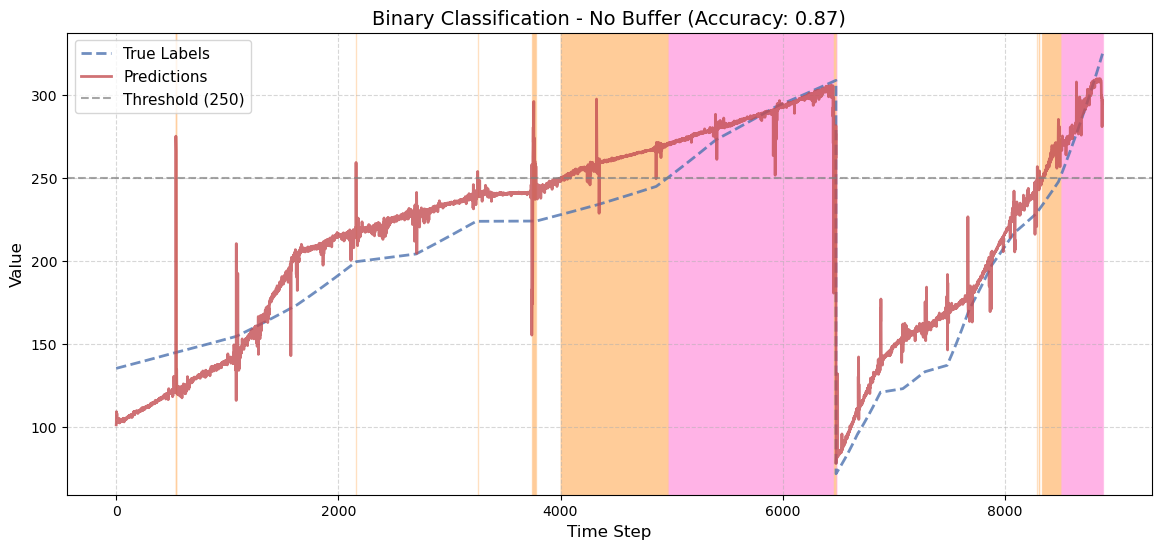

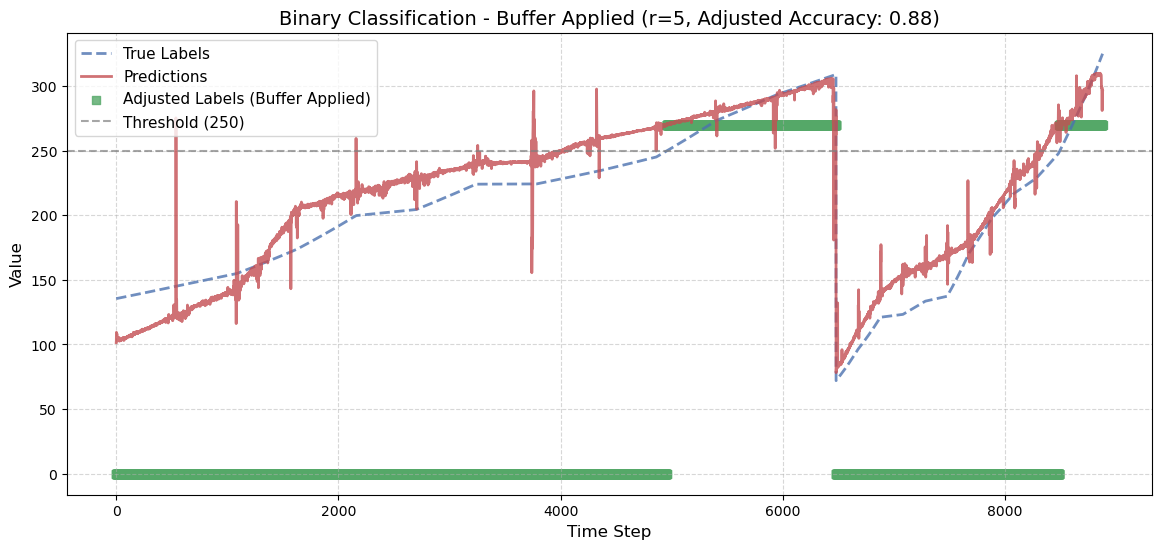

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 리스트라면 NumPy 배열로 변환
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

time_steps = len(all_preds)  # 시계열 길이

# Binary 변환 기준: 250 이상이면 1, 아니면 0
binary_preds = (all_preds > 250).astype(int)
binary_labels = (all_labels > 250).astype(int)

# Accuracy 계산
accuracy = np.mean(binary_preds == binary_labels)

# 버퍼 적용 (250 이상 구간 직전 r step만 1로 인정)
r = 5  # 버퍼 크기 (필요하면 변경 가능)
adjusted_labels = np.copy(binary_labels)

# 250 이상 구간 직전 r step만 인정
for i in range(1, time_steps):
    if all_labels[i] > 250:
        adjusted_labels[max(0, i - r):i] = 1  # 250 이상이 된 시점 이전 r 구간만 1로 인정

# Accuracy 재계산 (buffer 적용)
adjusted_accuracy = np.mean(binary_preds == adjusted_labels)

# ======= 첫 번째 플롯: 기본 binary labels 및 예측값 =======
plt.figure(figsize=(14, 6))
plt.plot(all_labels, label="True Labels", color="#4c72b0", linewidth=2, linestyle="dashed", alpha=0.8)
plt.plot(all_preds, label="Predictions", color="#c44e52", linewidth=2, linestyle="solid", alpha=0.8)

# 실제 anomaly (True Labels > 250) → 핑크색 영역 표시
for i in range(time_steps):
    if all_labels[i] > 250:
        plt.axvspan(i - 0.5, i + 0.5, color="#ffb3e6", alpha=0.4)  # 연한 핑크

# False Prediction 구간 (예측이 틀린 부분) → 주황색 강조
false_preds = np.where(binary_preds != binary_labels)[0]
for i in false_preds:
    plt.axvspan(i - 0.5, i + 0.5, color="#ffcc99", alpha=0.6)  # 연한 주황색

# Threshold line
plt.axhline(y=250, color="gray", linestyle="--", linewidth=1.5, alpha=0.7, label="Threshold (250)")

# 그래프 스타일 조정
plt.xlabel("Time Step", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.title(f"Binary Classification - No Buffer (Accuracy: {accuracy:.2f})", fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# ======= 📌 두 번째 플롯: 버퍼 적용한 adjusted labels =======
plt.figure(figsize=(14, 6))
plt.plot(all_labels, label="True Labels", color="#4c72b0", linewidth=2, linestyle="dashed", alpha=0.8)
plt.plot(all_preds, label="Predictions", color="#c44e52", linewidth=2, linestyle="solid", alpha=0.8)

# Adjusted labels with buffer 적용 구간 표시 (연두색)
plt.scatter(range(time_steps), adjusted_labels * 270, color="#55a868", marker="s", alpha=0.8, label="Adjusted Labels (Buffer Applied)")

# Threshold line
plt.axhline(y=250, color="gray", linestyle="--", linewidth=1.5, alpha=0.7, label="Threshold (250)")

plt.xlabel("Time Step", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.title(f"Binary Classification - Buffer Applied (r={r}, Adjusted Accuracy: {adjusted_accuracy:.2f})", fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


### Classifier Train

In [10]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets, models
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import numpy as np

# === 설정 ===
train_data_dir = "/home/crois-times/timeseries/JJ/Harvard_Multimodal/Mel_spectrogram/T1"  # T1: Train + Val

batch_size = 32
num_epochs = 10
learning_rate = 0.001
image_size = (128, 128)
train_anomaly_threshold = 4041  # T1에서 4041 이후 Anomaly
test_anomaly_threshold = 4961  # T5에서 4961 이후 Anomaly

# === 데이터셋 정의 ===
class MelSpectrogramDataset(Dataset):
    def __init__(self, data_dir, transform=None, is_test=False):
        self.data_dir = data_dir
        self.image_files = sorted(os.listdir(data_dir), key=lambda x: int(x.split("_")[0]))  # 이미지 정렬
        self.transform = transform
        self.is_test = is_test  # 테스트 여부 결정

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.data_dir, img_name)
        image = Image.open(img_path).convert("RGB")

        # 라벨 지정 (Train: T1 기준, Test: T5 기준)
        if self.is_test:
            label = 1 if idx >= test_anomaly_threshold else 0
        else:
            label = 1 if idx >= train_anomaly_threshold else 0

        if self.transform:
            image = self.transform(image)

        return image, label, img_name  # 테스트 시 img_name 포함

# === 데이터 변환 설정 ===
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# === 데이터 로더 준비 ===
train_dataset = MelSpectrogramDataset(train_data_dir, transform)

# Train/Validation Split (80% Train, 20% Val) → **Shuffle 가능**
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)



In [13]:

# def evaluate_model(model, val_loader):
#     model.eval()
#     correct, total = 0, 0
    
#     with torch.no_grad():
#         for images, labels, _ in val_loader:
#             images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
#             outputs = model(images)
#             predicted = (outputs > 0.5).float()
#             correct += (predicted == labels).sum().item()
#             total += labels.size(0)
    
#     return correct / total

# # === ✅ 학습 함수 ===
# def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
#     for epoch in range(num_epochs):
#         model.train()
#         running_loss = 0.0
#         correct, total = 0, 0
        
#         for images, labels, _ in train_loader:
#             images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
            
#             optimizer.zero_grad()
#             outputs = model(images)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()
            
#             running_loss += loss.item()
#             predicted = (outputs > 0.5).float()
#             correct += (predicted == labels).sum().item()
#             total += labels.size(0)
        
#         train_acc = correct / total
#         val_acc = evaluate_model(model, val_loader)
#         print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")




In [11]:
batch_size = 32
num_epochs = 10
learning_rate = 0.001
image_size = (128, 128)
train_anomaly_threshold = 4041  # T1에서 4041 이후 Anomaly
test_anomaly_threshold = 4961  # T5에서 4961 이후 Anomaly


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model = CNNClassifier(image_size=image_size).to(device)
# eff = EfficientNetBinary(pretrained=True).to(device)
# mob = MobileNetBinary(pretrained=False).to(device)
# res = ResNetClassifier(pretrained=False).to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [12]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets, models
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # ✅ tqdm 추가



# === ✅ 데이터셋 정의 ===
class MelSpectrogramDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.image_files = sorted(os.listdir(data_dir), key=lambda x: int(x.split("_")[0]))  # 이미지 정렬
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.data_dir, img_name)
        image = Image.open(img_path).convert("RGB")

        # 라벨 지정 (T1: 4041 이후 Anomaly)
        label = 1 if idx >= train_anomaly_threshold else 0

        if self.transform:
            image = self.transform(image)

        return image, label

# === ✅ 데이터 변환 설정 ===
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# === ✅ 데이터 로더 준비 ===
train_dataset = MelSpectrogramDataset(train_data_dir, transform)

# Train/Validation Split (80% Train, 20% Val)
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)


# === ✅ 평가 함수 ===
def evaluate_model(model, val_loader):
    model.eval()
    total_loss, correct, total = 0.0, 0, 0
    
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc="Validating", leave=False):
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            predicted = (outputs > 0.5).float()
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    
    return total_loss / len(val_loader), correct / total  # 평균 Loss, Accuracy 반환

# === ✅ 학습 함수 (tqdm 추가 + Loss Curve 저장) ===
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    train_losses, val_losses = [], []
    best_val_loss = float("inf")  # 초기화 (최적 모델 저장용)

    for epoch in range(num_epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        
        progress_bar = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{num_epochs}]", leave=True)

        for images, labels in progress_bar:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            predicted = (outputs > 0.5).float()
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
            
            progress_bar.set_postfix(loss=f"{loss.item():.4f}", acc=f"{(correct/total):.4f}")

        # Epoch 종료 후 검증 수행
        train_loss = running_loss / len(train_loader)
        val_loss, val_acc = evaluate_model(model, val_loader)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        # 최적 모델 저장 (Validation Loss 기준)
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), "best_model.pth")
            print(f"✅ Model Saved (Best Val Loss: {best_val_loss:.4f})")

        print(f"\nEpoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss:.4f}, Train Acc :{(correct/total):.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    # Loss Curve 그리기
    plot_loss_curve(train_losses, val_losses)

# === ✅ Loss Curve 시각화 함수 ===
def plot_loss_curve(train_losses, val_losses):
    plt.figure(figsize=(8, 6))
    plt.plot(train_losses, label="Train Loss", marker="o")
    plt.plot(val_losses, label="Val Loss", marker="o", linestyle="dashed")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Train & Validation Loss Curve")
    plt.legend()
    plt.grid()
    plt.savefig("loss_curve.png")  # ✅ Loss Curve 저장
    plt.show()



Epoch [1/10]: 100%|██████████| 162/162 [00:35<00:00,  4.50it/s, acc=0.6811, loss=0.6494]


✅ Model Saved (Best Val Loss: 0.5707)

Epoch [1/10] - Train Loss: 0.5928, Train Acc :0.6811, Val Loss: 0.5707, Val Acc: 0.6991


Epoch [2/10]: 100%|██████████| 162/162 [00:30<00:00,  5.29it/s, acc=0.7421, loss=0.4497]


✅ Model Saved (Best Val Loss: 0.4469)

Epoch [2/10] - Train Loss: 0.5061, Train Acc :0.7421, Val Loss: 0.4469, Val Acc: 0.7963


Epoch [3/10]: 100%|██████████| 162/162 [00:33<00:00,  4.87it/s, acc=0.8740, loss=0.0936]


✅ Model Saved (Best Val Loss: 0.1892)

Epoch [3/10] - Train Loss: 0.2848, Train Acc :0.8740, Val Loss: 0.1892, Val Acc: 0.9259


Epoch [4/10]: 100%|██████████| 162/162 [00:31<00:00,  5.11it/s, acc=0.9504, loss=0.1709]


✅ Model Saved (Best Val Loss: 0.1049)

Epoch [4/10] - Train Loss: 0.1314, Train Acc :0.9504, Val Loss: 0.1049, Val Acc: 0.9545


Epoch [5/10]: 100%|██████████| 162/162 [00:31<00:00,  5.20it/s, acc=0.9855, loss=0.0129]


✅ Model Saved (Best Val Loss: 0.0306)

Epoch [5/10] - Train Loss: 0.0545, Train Acc :0.9855, Val Loss: 0.0306, Val Acc: 0.9938


Epoch [6/10]: 100%|██████████| 162/162 [00:32<00:00,  4.95it/s, acc=0.9961, loss=0.0105]



Epoch [6/10] - Train Loss: 0.0243, Train Acc :0.9961, Val Loss: 0.0330, Val Acc: 0.9900


Epoch [7/10]: 100%|██████████| 162/162 [00:33<00:00,  4.78it/s, acc=0.9983, loss=0.0084]


✅ Model Saved (Best Val Loss: 0.0115)

Epoch [7/10] - Train Loss: 0.0145, Train Acc :0.9983, Val Loss: 0.0115, Val Acc: 0.9977


Epoch [8/10]: 100%|██████████| 162/162 [00:31<00:00,  5.17it/s, acc=0.9994, loss=0.0035]



Epoch [8/10] - Train Loss: 0.0067, Train Acc :0.9994, Val Loss: 0.0195, Val Acc: 0.9938


Epoch [9/10]: 100%|██████████| 162/162 [00:32<00:00,  4.98it/s, acc=0.9994, loss=0.0025]


✅ Model Saved (Best Val Loss: 0.0113)

Epoch [9/10] - Train Loss: 0.0053, Train Acc :0.9994, Val Loss: 0.0113, Val Acc: 0.9977


Epoch [10/10]: 100%|██████████| 162/162 [00:32<00:00,  5.01it/s, acc=1.0000, loss=0.0022]


✅ Model Saved (Best Val Loss: 0.0058)

Epoch [10/10] - Train Loss: 0.0033, Train Acc :1.0000, Val Loss: 0.0058, Val Acc: 0.9977


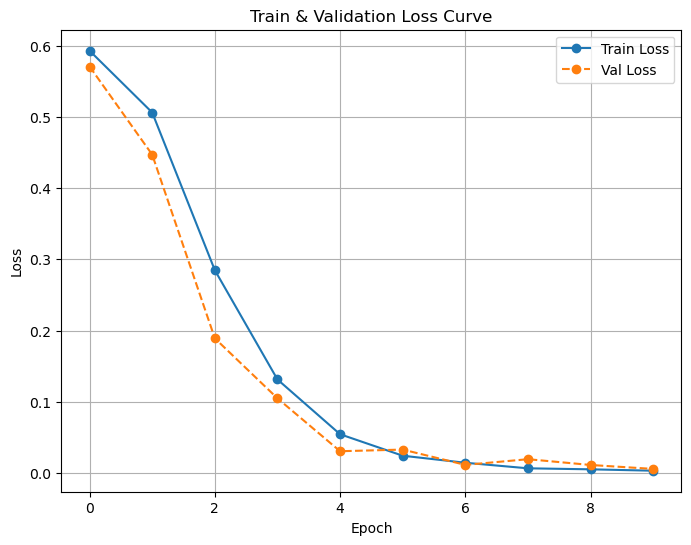

In [13]:
# === ✅ 모델 학습 실행 (tqdm + Loss Curve + 최적 모델 저장) ===
# === ✅ 설정 ===
train_data_dir = "/home/crois-times/timeseries/JJ/Harvard_Multimodal/Mel_spectrogram/T1"
batch_size = 128
num_epochs = 10
learning_rate = 0.001
image_size = (128, 128)
train_anomaly_threshold = 4041  # T1에서 4041 이후 Anomaly

train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs)


In [14]:
# 저장할 경로
save_path = "./model_weights/best_classifier_T1.pth"

# 모델 저장
torch.save(model.state_dict(), save_path)
print(f"✅ 모델이 저장되었습니다: {save_path}")


✅ 모델이 저장되었습니다: ./model_weights/best_classifier_T1.pth


### Classifier Inference

In [15]:
import os
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
from PIL import Image


# === ✅ 데이터셋 정의 ===
class MelSpectrogramDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.image_files = sorted(os.listdir(data_dir), key=lambda x: int(x.split("_")[0]))  # 이미지 정렬
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.data_dir, img_name)
        image = Image.open(img_path).convert("RGB")

        # ✅ 라벨 지정 (T5: 4961번째 이후 Anomaly)
        label = 1 if idx >= test_anomaly_threshold else 0

        if self.transform:
            image = self.transform(image)

        return image, label  # ✅ 문제 없음



# === ✅ 평가 함수 ===
def evaluate_test(model, test_loader):
    model.eval()
    correct, total = 0, 0
    predictions = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
            outputs = model(images)
            predicted = (outputs > 0.5).float()
            probabilities = outputs.sigmoid().cpu().numpy().flatten()  # ✅ 예측 확률값 추가

            # ✅ Accuracy 계산
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            # ✅ 라벨을 squeeze()로 차원 맞춰서 저장
            for true_label, pred_prob in zip(labels.cpu().numpy().squeeze(), probabilities):
                predictions.append((int(true_label), pred_prob))  # ✅ 예측 확률 포함

    accuracy = correct / total
    print(f"Test Accuracy: {accuracy:.4f}")
    return predictions  # ✅ 예측 결과 반환


In [ ]:
# === ✅ 설정 ===
test_data_dir = "/home/crois-times/timeseries/JJ/Harvard_Multimodal/Mel_spectrogram/T5"  # T5: Test
test_anomaly_threshold = 4961  # ✅ 오타 수정
# === ✅ 데이터 변환 및 로딩 ===
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

test_dataset = MelSpectrogramDataset(test_data_dir, transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)  # ✅ 배치 크기 설정

In [16]:

train_dataset = MelSpectrogramDataset(train_data_dir, transform)
train_loader2 = DataLoader(train_dataset, batch_size=32, shuffle=False)  # ✅ 배치 크기 설정

In [21]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
# ✅ 모델 평가 실행
test_predictions = evaluate_test(model, train_loader)

Test Accuracy: 0.8576


In [22]:
test_predictions

[(0, 0.500996),
 (0, 0.5009697),
 (0, 0.50053275),
 (0, 0.500124),
 (0, 0.50160766),
 (0, 0.5009793),
 (0, 0.5002574),
 (0, 0.5001982),
 (0, 0.5004637),
 (0, 0.5001299),
 (0, 0.5000367),
 (0, 0.50002664),
 (0, 0.5006709),
 (0, 0.50020325),
 (0, 0.50013053),
 (0, 0.5000289),
 (0, 0.5001849),
 (0, 0.5003027),
 (0, 0.5000435),
 (0, 0.50023264),
 (0, 0.50041145),
 (0, 0.5017908),
 (0, 0.5002103),
 (0, 0.50004333),
 (0, 0.50010484),
 (0, 0.5000371),
 (0, 0.50006163),
 (0, 0.5000157),
 (0, 0.5000104),
 (0, 0.5000412),
 (0, 0.5002562),
 (0, 0.50008374),
 (0, 0.5000631),
 (0, 0.5001771),
 (0, 0.5003182),
 (0, 0.5000123),
 (0, 0.50007915),
 (0, 0.50016767),
 (0, 0.5005608),
 (0, 0.5000841),
 (0, 0.5000034),
 (0, 0.5000578),
 (0, 0.5000298),
 (0, 0.50009096),
 (0, 0.5000555),
 (0, 0.5001468),
 (0, 0.5003095),
 (0, 0.50015444),
 (0, 0.5006685),
 (0, 0.5003707),
 (0, 0.50199366),
 (0, 0.5010498),
 (0, 0.50014603),
 (0, 0.5000972),
 (0, 0.5005488),
 (0, 0.5000965),
 (0, 0.500175),
 (0, 0.5000208),


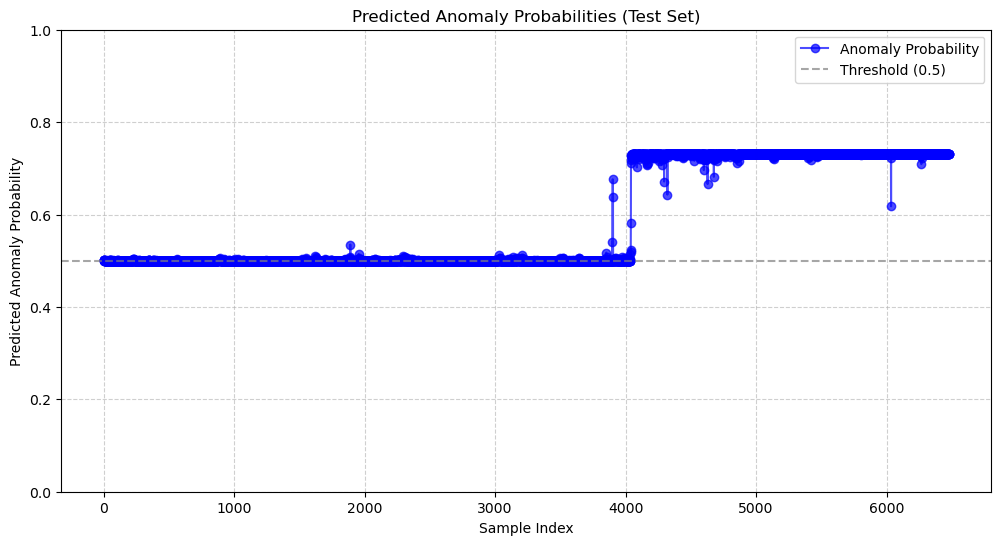

In [23]:
import matplotlib.pyplot as plt

def plot_anomaly_probabilities(predictions):
    # ✅ 예측 확률만 추출 (Anomaly 확률)
    anomaly_probs = [prob for _, prob in predictions]

    # ✅ 시각화 (선 그래프)
    plt.figure(figsize=(12, 6))
    plt.plot(anomaly_probs, marker="o", linestyle="-", color="blue", alpha=0.7, label="Anomaly Probability")
    plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7, label="Threshold (0.5)")  # 기준선 추가
    plt.xlabel("Sample Index")
    plt.ylabel("Predicted Anomaly Probability")
    plt.title("Predicted Anomaly Probabilities (Test Set)")
    plt.ylim(0, 1)  # 확률 범위 고정 (0~1)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

# ✅ 예측된 확률값을 시각화
plot_anomaly_probabilities(test_predictions)


In [24]:
import pandas as pd

# ✅ CNN 예측 확률값을 저장할 DataFrame 생성
df_cnn_predictions = pd.DataFrame({
    "Anomaly_Probability": [prob for _, prob in test_predictions]
})

# ✅ CSV 파일로 저장
df_cnn_predictions.to_csv("cnn_predictions_0410_onlyT1.csv", index=False)

print("CNN Predictions saved as 'cnn_predictions0410_onlyT1.csv'.")


CNN Predictions saved as 'cnn_predictions0410_onlyT1.csv'.


### Multimodal-inference(stacking layer)

In [42]:
cnn_predictions = pd.read_csv('cnn_predictions_0410_onlyT1.csv')

In [54]:
lstm_predictions = pd.read_csv('regression_predictions_lstm_T1.csv')

In [44]:
cnn_predictions

,Anomaly_Probability
0,0.500996
1,0.500970
2,0.500533
3,0.500124
4,0.501608
...,...
6475,0.730961
6476,0.730996
6477,0.730983
6478,0.730989


In [55]:
lstm_predictions = lstm_predictions[:6480]

In [56]:
lstm_predictions

,Regression_Output,True_Labels
0,101.89988,102.472000
1,101.47234,102.507324
2,104.70834,102.542660
3,103.51423,102.578010
4,104.43867,102.613370
...,...,...
6475,305.32983,306.336120
6476,306.49725,306.364600
6477,305.39700,306.393070
6478,305.64620,306.421540


In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score


df_cnn = pd.read_csv("cnn_predictions_0410_onlyT1.csv")  # CNN Anomaly 확률
df_gru = pd.read_csv("regression_predictions_lstm_T1.csv")  # GRU 회귀 예측값

# Stacking을 위한 Feature 생성 (GRU 예측값 앞 6480개만 사용)
X_meta = np.column_stack((df_gru["Regression_Output"][:6480], df_cnn["Anomaly_Probability"]))  # (GRU 예측값, CNN 확률)
y_meta = np.array([1 if i >= 4961 else 0 for i in range(6480)])  # Ground Truth 생성 (6480개)

#PyTorch Tensor 변환
X_meta_tensor = torch.tensor(X_meta, dtype=torch.float32)
y_meta_tensor = torch.tensor(y_meta, dtype=torch.float32).unsqueeze(1)  # (batch_size, 1) 형태로 변환

# === MLP 모델 정의 ===
class MLPStacking(nn.Module):
    def __init__(self, input_dim):
        super(MLPStacking, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_dim = X_meta.shape[1]  # Feature 개수 (2개: GRU + CNN)
mlp_model = MLPStacking(input_dim).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(mlp_model.parameters(), lr=0.001)


X_meta_tensor, y_meta_tensor = X_meta_tensor.to(device), y_meta_tensor.to(device)


num_epochs = 20000
for epoch in range(num_epochs):
    mlp_model.train()
    optimizer.zero_grad()
    
    outputs = mlp_model(X_meta_tensor)
    loss = criterion(outputs, y_meta_tensor)
    
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


mlp_model.eval()
with torch.no_grad():
    final_predictions = (mlp_model(X_meta_tensor) > 0.5).cpu().numpy().astype(int)

final_accuracy = accuracy_score(y_meta, final_predictions)
print(f"Final Stacked Model Accuracy (MLP): {final_accuracy:.4f}")


Epoch [10/20000], Loss: 1.6559
Epoch [20/20000], Loss: 0.6142
Epoch [30/20000], Loss: 0.6725
Epoch [40/20000], Loss: 0.6368
Epoch [50/20000], Loss: 0.6366
Epoch [60/20000], Loss: 0.6194
Epoch [70/20000], Loss: 0.6118
Epoch [80/20000], Loss: 0.6120
Epoch [90/20000], Loss: 0.6109
Epoch [100/20000], Loss: 0.6101
Epoch [110/20000], Loss: 0.6095
Epoch [120/20000], Loss: 0.6088
Epoch [130/20000], Loss: 0.6082
Epoch [140/20000], Loss: 0.6075
Epoch [150/20000], Loss: 0.6068
Epoch [160/20000], Loss: 0.6061
Epoch [170/20000], Loss: 0.6054
Epoch [180/20000], Loss: 0.6046
Epoch [190/20000], Loss: 0.6039
Epoch [200/20000], Loss: 0.6031
Epoch [210/20000], Loss: 0.6023
Epoch [220/20000], Loss: 0.6015
Epoch [230/20000], Loss: 0.6007
Epoch [240/20000], Loss: 0.5998
Epoch [250/20000], Loss: 0.5990
Epoch [260/20000], Loss: 0.5981
Epoch [270/20000], Loss: 0.5972
Epoch [280/20000], Loss: 0.5964
Epoch [290/20000], Loss: 0.5955
Epoch [300/20000], Loss: 0.5946
Epoch [310/20000], Loss: 0.5937
Epoch [320/20000]

In [52]:
# 전체 모델 저장 (추천)
torch.save(mlp_model.state_dict(), "model_weights/mlp_stacking_model.pth")


In [53]:
# 동일한 모델 구조 먼저 정의
mlp_model = MLPStacking(input_dim=input_dim).to(device)

# 저장된 파라미터 로드
mlp_model.load_state_dict(torch.load("model_weights/mlp_stacking_model.pth", map_location=device))

# 추론 모드로 전환
mlp_model.eval()


MLPStacking(
  (fc1): Linear(in_features=2, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [58]:
import pandas as pd
import torch
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# === T5 TEST용 CSV 불러오기 ===
df_cnn_test = pd.read_csv("cnn_predictions.csv")  # CNN 확률
df_gru_test = pd.read_csv("regression_predictions_lstm_T5.csv")  # GRU 예측값

# === Feature 생성 (CNN 확률 + GRU 회귀 예측값)
X_test = np.column_stack((df_gru_test["Regression_Output"][:6480], df_cnn_test["Anomaly_Probability"]))

# === Ground Truth 라벨 생성 (예시: T5에서 4961 이후는 이상이라고 가정)
y_test = np.array([1 if i >= 4961 else 0 for i in range(len(X_test))])

# === Tensor로 변환
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1).to(device)

# === MLP 모델 평가
mlp_model.eval()
with torch.no_grad():
    y_pred_prob = mlp_model(X_test_tensor).cpu().numpy()
    y_pred_cls = (y_pred_prob > 0.5).astype(int)

# === 지표 출력
print("✅ Test 성능 평가")
print(f"Accuracy : {accuracy_score(y_test, y_pred_cls):.4f}")
print(f"F1 Score : {f1_score(y_test, y_pred_cls):.4f}")
print(f"AUROC    : {roc_auc_score(y_test, y_pred_prob):.4f}")


✅ Test 성능 평가
Accuracy : 0.9847
F1 Score : 0.9675
AUROC    : 0.9941


### RUL 예측

In [60]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd

# === ✅ 데이터 불러오기 ===
df_cnn = pd.read_csv("cnn_predictions_0410_onlyT1.csv")  # CNN Anomaly 확률
df_gru = pd.read_csv("regression_predictions_lstm_T1.csv")  # GRU 회귀 예측값

# === ✅ Feature 구성 ===
X_meta = np.column_stack((df_gru["Regression_Output"][:6480], df_cnn["Anomaly_Probability"]))

# === ✅ RUL 라벨 생성 ===
y_rul = np.array([max(0, (4960 - i) * 0.1) for i in range(6480)])  # 초 단위 RUL (0.1초 간격)

# === ✅ Tensor 변환 ===
X_tensor = torch.tensor(X_meta, dtype=torch.float32)
y_tensor = torch.tensor(y_rul, dtype=torch.float32).unsqueeze(1)  # (batch_size, 1)

# === ✅ RUL 예측 MLP 정의 ===
class RUL_MLP(nn.Module):
    def __init__(self, input_dim):
        super(RUL_MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)  # RUL 예측 (0~648 초 범위)

# === ✅ 설정 ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_dim = X_meta.shape[1]
model = RUL_MLP(input_dim).to(device)
criterion = nn.MSELoss()  # 회귀니까 MSE!
optimizer = optim.Adam(model.parameters(), lr=0.001)

X_tensor, y_tensor = X_tensor.to(device), y_tensor.to(device)

# === ✅ 학습 ===
num_epochs = 20000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    preds = model(X_tensor)
    loss = criterion(preds, y_tensor)

    loss.backward()
    optimizer.step()

    if (epoch + 1) % 500 == 0:
        print(f"[{epoch+1}/{num_epochs}] Loss: {loss.item():.4f}")

# === ✅ 예측 및 출력 ===
model.eval()
with torch.no_grad():
    predictions = model(X_tensor).cpu().numpy().flatten()

# === ✅ 예시 출력 (앞 10개만) ===
for i, p in enumerate(predictions[:10]):
    print(f"🧠 샘플 {i+1}: ⏳ 예측 잔여 수명: {p:.1f} 초")


[500/20000] Loss: 41375.6758
[1000/20000] Loss: 41169.0000
[1500/20000] Loss: 40179.6992
[2000/20000] Loss: 21015.4941
[2500/20000] Loss: 5337.1968
[3000/20000] Loss: 3996.2297
[3500/20000] Loss: 3188.2737
[4000/20000] Loss: 2582.5476
[4500/20000] Loss: 2104.4236
[5000/20000] Loss: 1722.3550
[5500/20000] Loss: 1422.4694
[6000/20000] Loss: 1200.1493
[6500/20000] Loss: 1051.1766
[7000/20000] Loss: 966.8217
[7500/20000] Loss: 952.9590
[8000/20000] Loss: 924.9400
[8500/20000] Loss: 919.4755
[9000/20000] Loss: 931.7387
[9500/20000] Loss: 911.3087
[10000/20000] Loss: 912.0798
[10500/20000] Loss: 933.5007
[11000/20000] Loss: 914.0877
[11500/20000] Loss: 911.0427
[12000/20000] Loss: 917.1432
[12500/20000] Loss: 920.8655
[13000/20000] Loss: 910.8142
[13500/20000] Loss: 911.1039
[14000/20000] Loss: 915.9526
[14500/20000] Loss: 913.6674
[15000/20000] Loss: 941.1426
[15500/20000] Loss: 911.2843
[16000/20000] Loss: 910.5099
[16500/20000] Loss: 910.5127
[17000/20000] Loss: 910.4879
[17500/20000] Los

In [64]:
# 저장이 안 됐다면, T1 학습 시 아래처럼 저장했어야 해:
torch.save(model.state_dict(), "rul_mlp_model.pth")


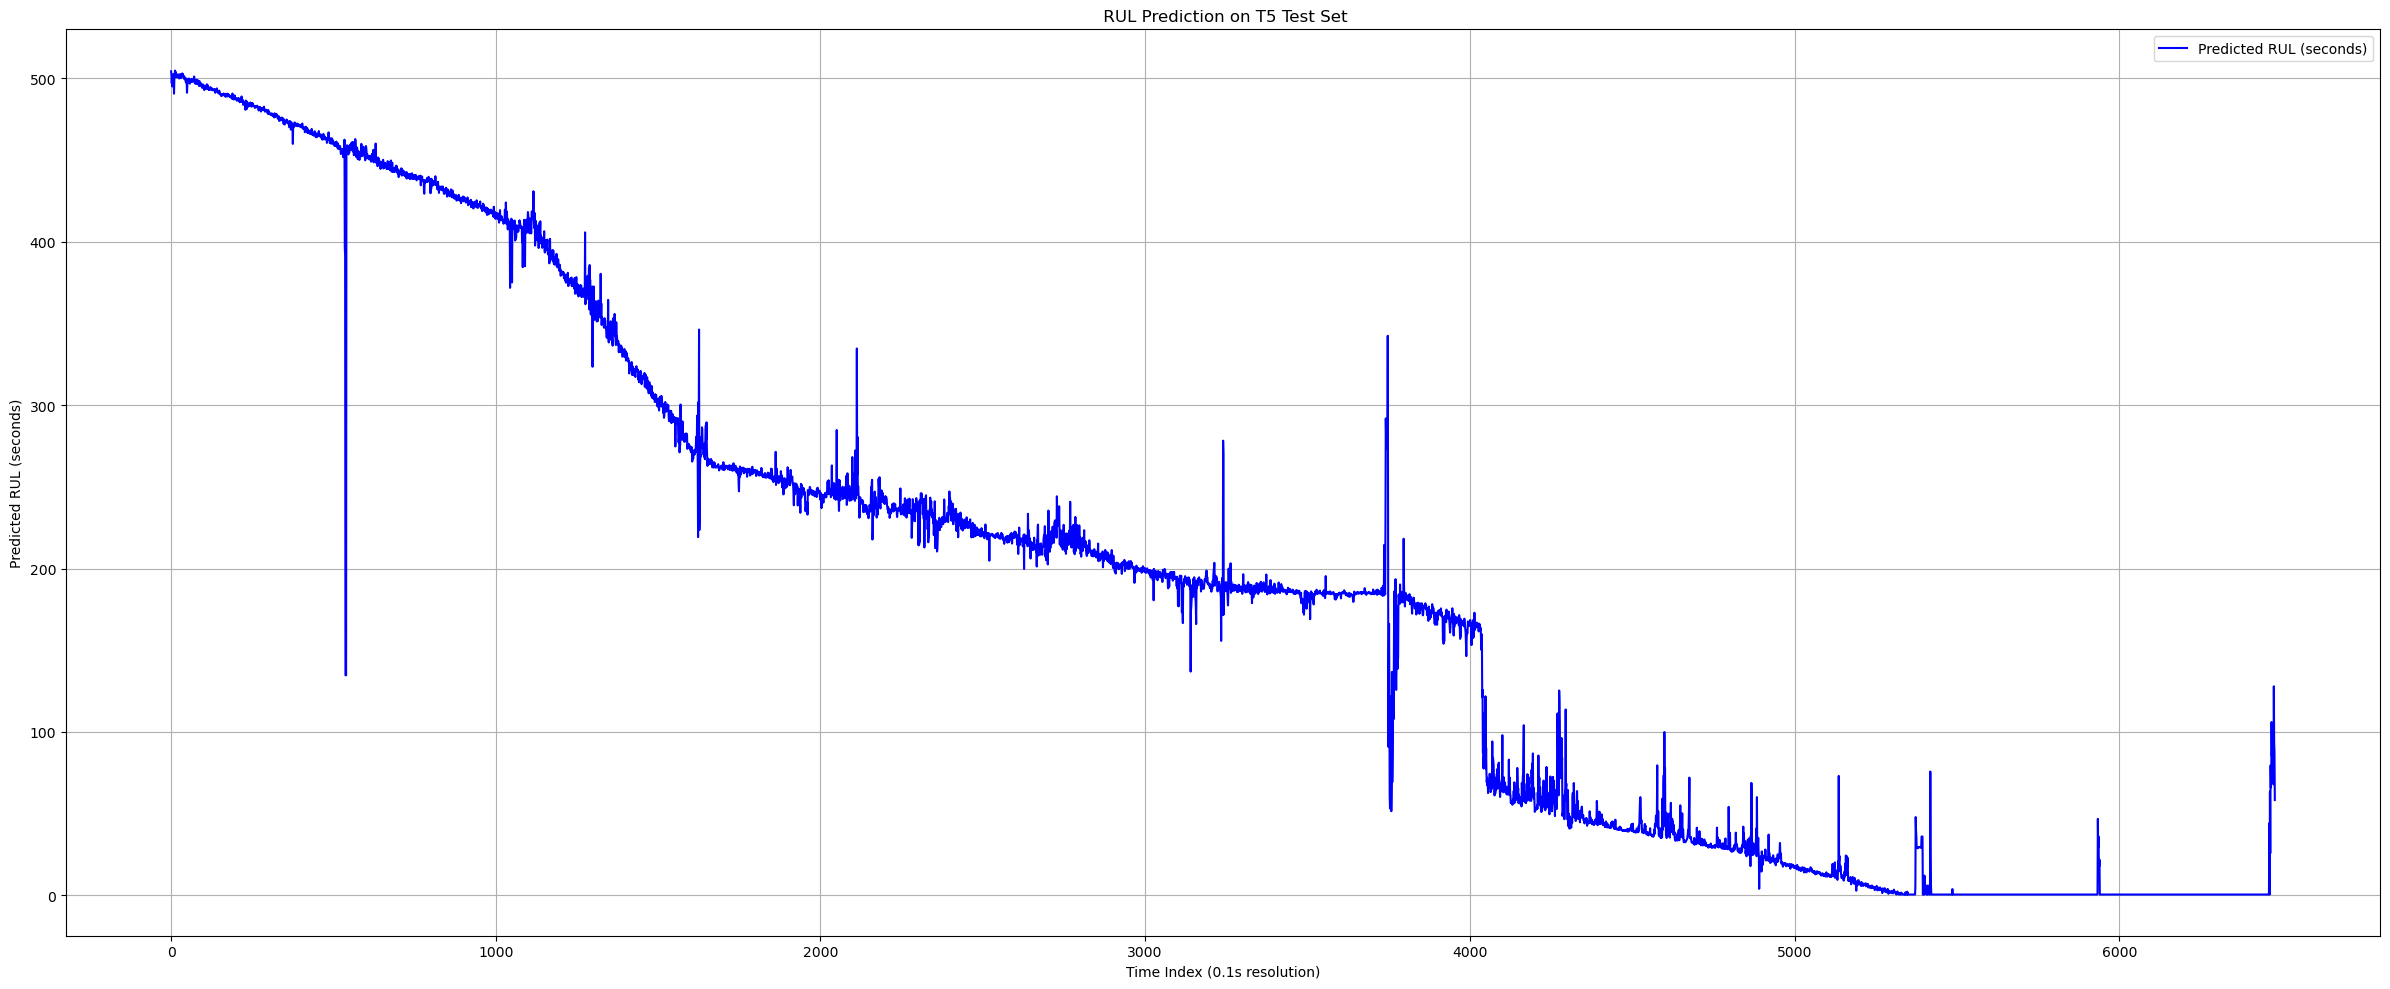


🔍 샘플별 예측 RUL (앞 20개):
Sample 1: ⏳ Predicted RUL = 504.4 seconds
Sample 2: ⏳ Predicted RUL = 502.1 seconds
Sample 3: ⏳ Predicted RUL = 497.1 seconds
Sample 4: ⏳ Predicted RUL = 500.0 seconds
Sample 5: ⏳ Predicted RUL = 495.1 seconds
Sample 6: ⏳ Predicted RUL = 499.5 seconds
Sample 7: ⏳ Predicted RUL = 500.1 seconds
Sample 8: ⏳ Predicted RUL = 502.7 seconds
Sample 9: ⏳ Predicted RUL = 502.6 seconds
Sample 10: ⏳ Predicted RUL = 490.7 seconds
Sample 11: ⏳ Predicted RUL = 499.2 seconds
Sample 12: ⏳ Predicted RUL = 500.6 seconds
Sample 13: ⏳ Predicted RUL = 504.8 seconds
Sample 14: ⏳ Predicted RUL = 503.6 seconds
Sample 15: ⏳ Predicted RUL = 503.0 seconds
Sample 16: ⏳ Predicted RUL = 503.8 seconds
Sample 17: ⏳ Predicted RUL = 502.4 seconds
Sample 18: ⏳ Predicted RUL = 500.8 seconds
Sample 19: ⏳ Predicted RUL = 500.6 seconds
Sample 20: ⏳ Predicted RUL = 502.2 seconds


In [67]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt

# === ✅ T5 TEST 데이터 불러오기 ===
df_cnn_test = pd.read_csv("cnn_predictions.csv")  # CNN 확률
df_gru_test = pd.read_csv("regression_predictions_lstm_T5.csv")  # GRU 예측값

# === ✅ Feature 구성 ===
X_test = np.column_stack((df_gru_test["Regression_Output"][:6480], df_cnn_test["Anomaly_Probability"]))

# === ✅ Tensor 변환
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)

# === ✅ 학습된 모델 불러오기
model = RUL_MLP(input_dim=2).to(device)
model.load_state_dict(torch.load("rul_mlp_model.pth"))
model.eval()

# === ✅ 예측
with torch.no_grad():
    rul_predictions = model(X_test_tensor).cpu().numpy().flatten()

# === ✅ 시각화
plt.figure(figsize=(24, 10))
plt.plot(rul_predictions, label='Predicted RUL (seconds)', color='blue')
plt.xlabel('Time Index (0.1s resolution)')
plt.ylabel('Predicted RUL (seconds)')
plt.title(' RUL Prediction on T5 Test Set')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === ✅ 예시 출력 (앞 10개만)
print("\n🔍 샘플별 예측 RUL (앞 20개):")
for i, p in enumerate(rul_predictions[:20]):
    print(f"Sample {i+1}: ⏳ Predicted RUL = {p:.1f} seconds")


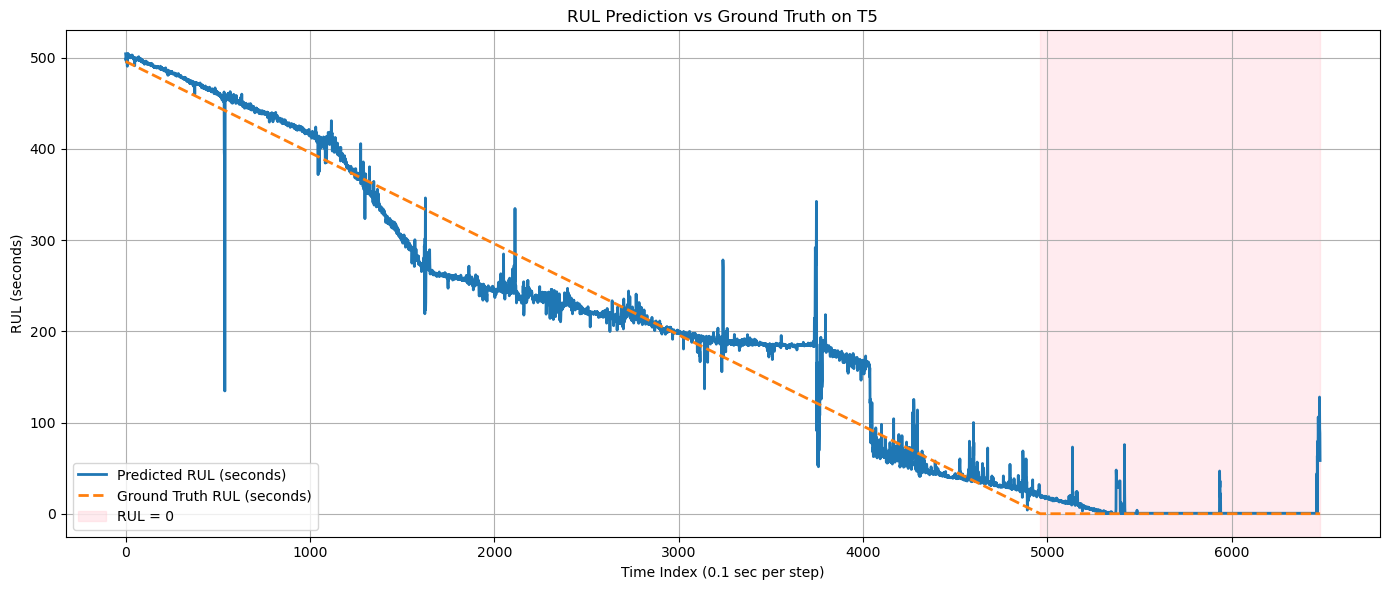

In [69]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt

# === ✅ T5 TEST 데이터 불러오기
df_cnn_test = pd.read_csv("cnn_predictions.csv")  # CNN 확률
df_gru_test = pd.read_csv("regression_predictions_lstm_T5.csv")  # GRU 예측값

# === ✅ Feature 구성
X_test = np.column_stack((df_gru_test["Regression_Output"][:6480], df_cnn_test["Anomaly_Probability"]))
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)

# === ✅ Ground Truth RUL (초 단위)
rul_gt = np.array([max(0, (4960 - i) * 0.1) for i in range(6480)])

# === ✅ 모델 정의
class RUL_MLP(nn.Module):
    def __init__(self, input_dim):
        super(RUL_MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

# === ✅ 모델 불러오기
model = RUL_MLP(input_dim=2).to(device)
model.load_state_dict(torch.load("rul_mlp_model.pth"))
model.eval()

# === ✅ 예측
with torch.no_grad():
    rul_pred = model(X_test_tensor).cpu().numpy().flatten()

# === ✅ 시각화
plt.figure(figsize=(14, 6))
plt.plot(rul_pred, label='Predicted RUL (seconds)', linewidth=2)
plt.plot(rul_gt, label='Ground Truth RUL (seconds)', linewidth=2, linestyle='--')

# 🔴 수명 종료 이후 영역 (분홍색 음영)
plt.axvspan(4960, 6480, color='pink', alpha=0.3, label='RUL = 0 ')

plt.xlabel('Time Index (0.1 sec per step)')
plt.ylabel('RUL (seconds)')
plt.title('RUL Prediction vs Ground Truth on T5')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


✅ T5 Test Set 성능 평가
Accuracy : 0.9847
F1 Score : 0.9675
AUROC    : 0.9941


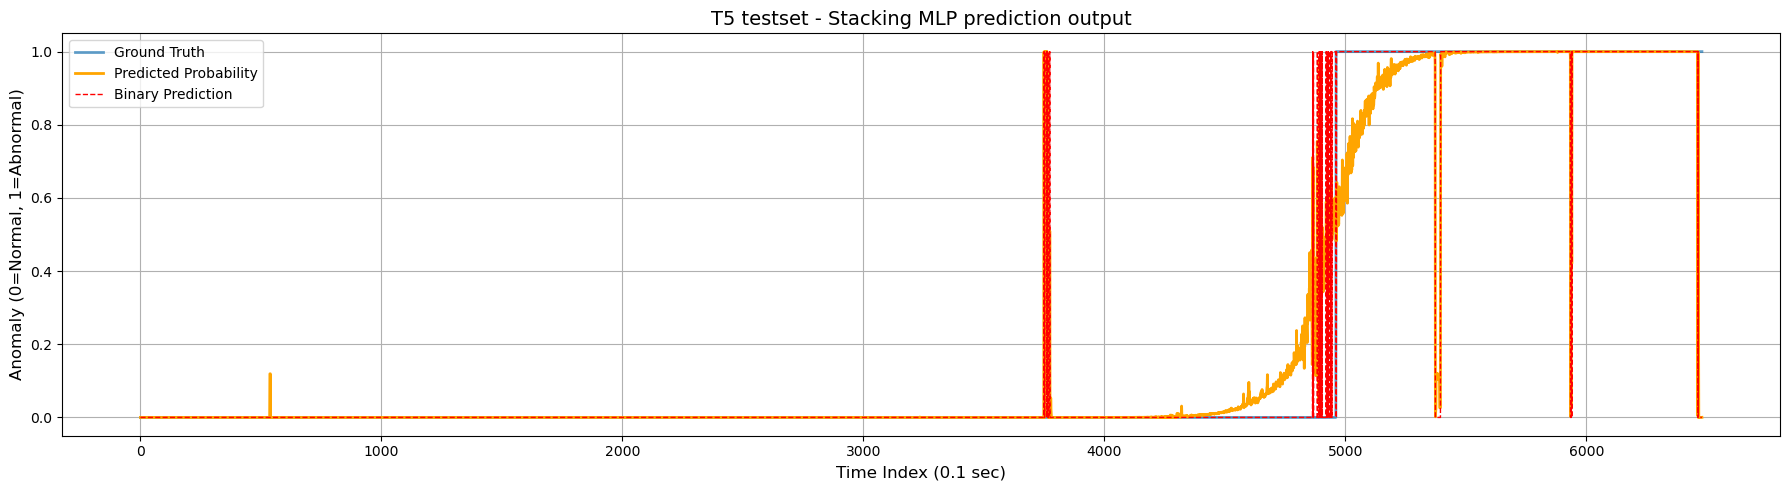

In [63]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# === ✅ T5 TEST CSV 불러오기 ===
df_cnn_test = pd.read_csv("cnn_predictions.csv")  # CNN 확률
df_gru_test = pd.read_csv("regression_predictions_lstm_T5.csv")  # GRU 예측값

# === ✅ Feature 생성 (GRU + CNN)
X_test = np.column_stack((df_gru_test["Regression_Output"][:6480], df_cnn_test["Anomaly_Probability"]))
y_test = np.array([1 if i >= 4961 else 0 for i in range(len(X_test))])  # Ground Truth

# === ✅ Tensor 변환
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1).to(device)

# === ✅ 모델 평가
mlp_model.eval()
with torch.no_grad():
    y_pred_prob = mlp_model(X_test_tensor).cpu().numpy().flatten()
    y_pred_cls = (y_pred_prob > 0.5).astype(int)

# === ✅ 성능 지표 출력
print("✅ T5 Test Set 성능 평가")
print(f"Accuracy : {accuracy_score(y_test, y_pred_cls):.4f}")
print(f"F1 Score : {f1_score(y_test, y_pred_cls):.4f}")
print(f"AUROC    : {roc_auc_score(y_test, y_pred_prob):.4f}")

# === ✅ 그래프 시각화
plt.figure(figsize=(18, 5))
plt.plot(y_test, label="Ground Truth", linewidth=2, alpha=0.7)
plt.plot(y_pred_prob, label="Predicted Probability", color='orange', linewidth=2)
plt.plot(y_pred_cls, label="Binary Prediction", linestyle='--', color='red', linewidth=1)

plt.title("T5 testset - Stacking MLP prediction output", fontsize=14)
plt.xlabel("Time Index (0.1 sec)", fontsize=12)
plt.ylabel("Anomaly (0=Normal, 1=Abnormal)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



### dummy

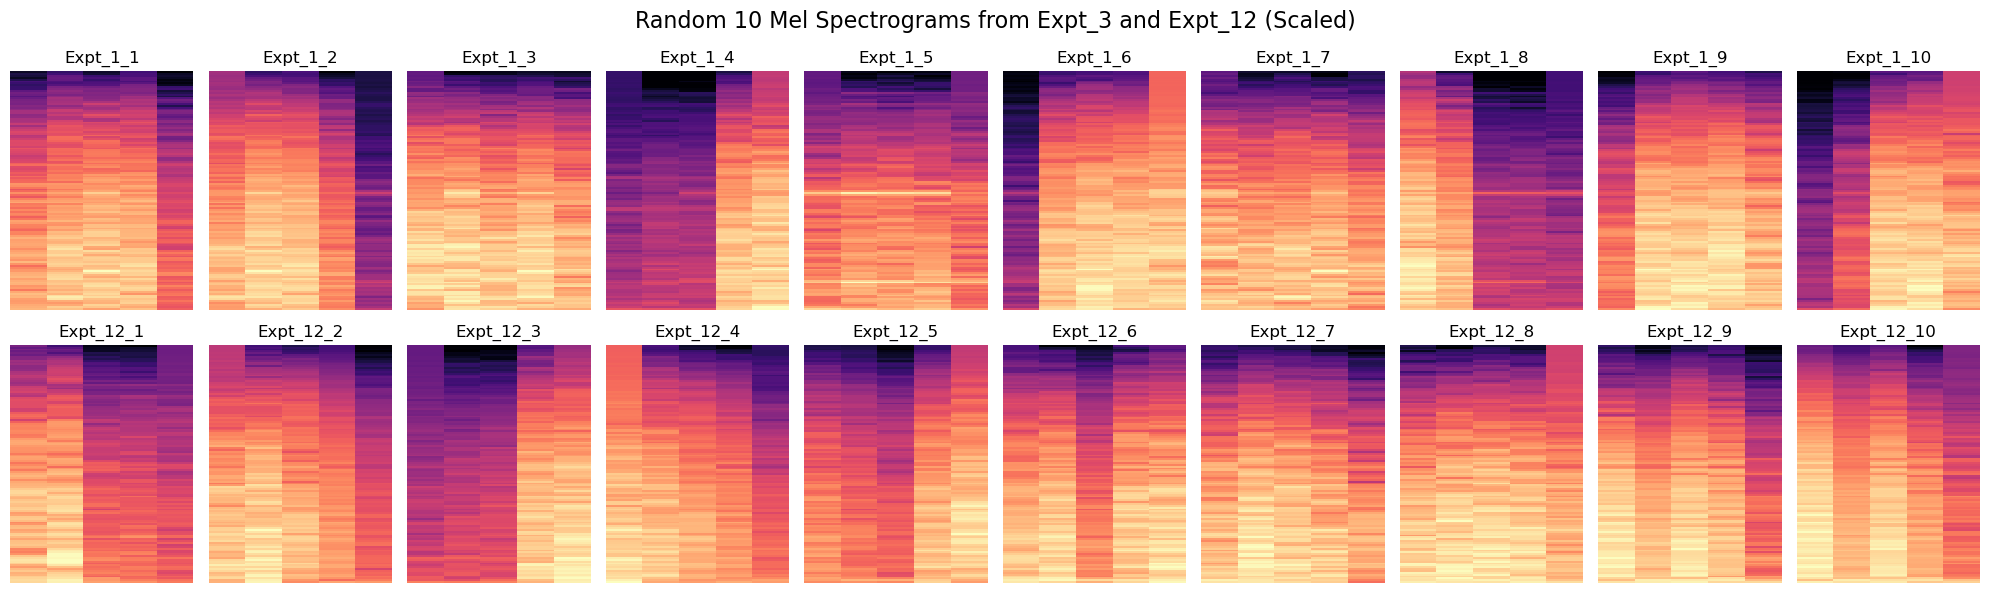

In [36]:
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import random

# === ✅ 설정 ===
data_dir = "/home/crois-times/timeseries/projects/tool_wear_havard/data/dataverse_files/Dataset/T1/Acoustic_Emission_Data"
num_splits = 10  # 무작위로 10개만 생성하여 시각화
window_size = 1000  # STFT 윈도우 크기
desired_length = 2048  # 보간 후 신호 길이
sr = 1000  # 샘플링 레이트
n_fft = 1000  # FFT 크기
hop_length = 512  # STFT hop 크기
n_mels = 128  # Mel 필터 개수
fmax = 500  # 저주파 강조

# === ✅ Mel Spectrogram 변환 함수 ===
def generate_mel_spectrogram(signal, sr=1000, n_fft=1000, hop_length=512, n_mels=128, fmax=500):
    """Mel Spectrogram 변환 (저주파 강조)"""
    mel_spec = librosa.feature.melspectrogram(y=signal, sr=sr, n_fft=n_fft, hop_length=hop_length, 
                                              n_mels=n_mels, fmin=0, fmax=fmax)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.min)  # 약한 신호도 강조
    return mel_spec_db

# === ✅ Expt_3과 Expt_12에서 무작위 10개 생성 및 시각화 ===
fig, axes = plt.subplots(2, 10, figsize=(20, 6))

for row_idx, expt_idx in enumerate([1, 12]):  # Expt_3, Expt_12 처리
    file_path = os.path.join(data_dir, f"Expt_{expt_idx}.csv")
    
    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    # 무작위 시작점 선택 (겹치지 않도록 설정)
    start_indices = random.sample(range(0, len(df) - window_size), num_splits)
    
    for col_idx, start in enumerate(start_indices):
        # 슬라이싱
        df_split = df.iloc[start : start + window_size].reset_index(drop=True)
        
        # 신호 데이터 (첫 번째 컬럼 사용)
        signal = df_split.iloc[:, 0].values
        
        # 보간 적용 (길이 맞추기)
        x_original = np.linspace(0, 1, len(signal))
        x_new = np.linspace(0, 1, desired_length)
        interpolator = interp1d(x_original, signal, kind='linear')
        signal_interpolated = interpolator(x_new)
        
        # === ✅ 방법 4 적용: 신호 크기 Scaling ===
        signal_scaled = signal_interpolated * np.mean(signal_interpolated)  # 크기에 비례한 Scaling
        
        # Mel Spectrogram 변환
        melspec_db = generate_mel_spectrogram(signal_scaled, sr, n_fft, hop_length, n_mels, fmax)
        
        # 시각화
        librosa.display.specshow(melspec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', ax=axes[row_idx, col_idx])
        axes[row_idx, col_idx].set_title(f"Expt_{expt_idx}_{col_idx+1}")
        axes[row_idx, col_idx].axis("off")

plt.suptitle("Random 10 Mel Spectrograms from Expt_3 and Expt_12 (Scaled)", fontsize=16)
plt.tight_layout()
plt.show()


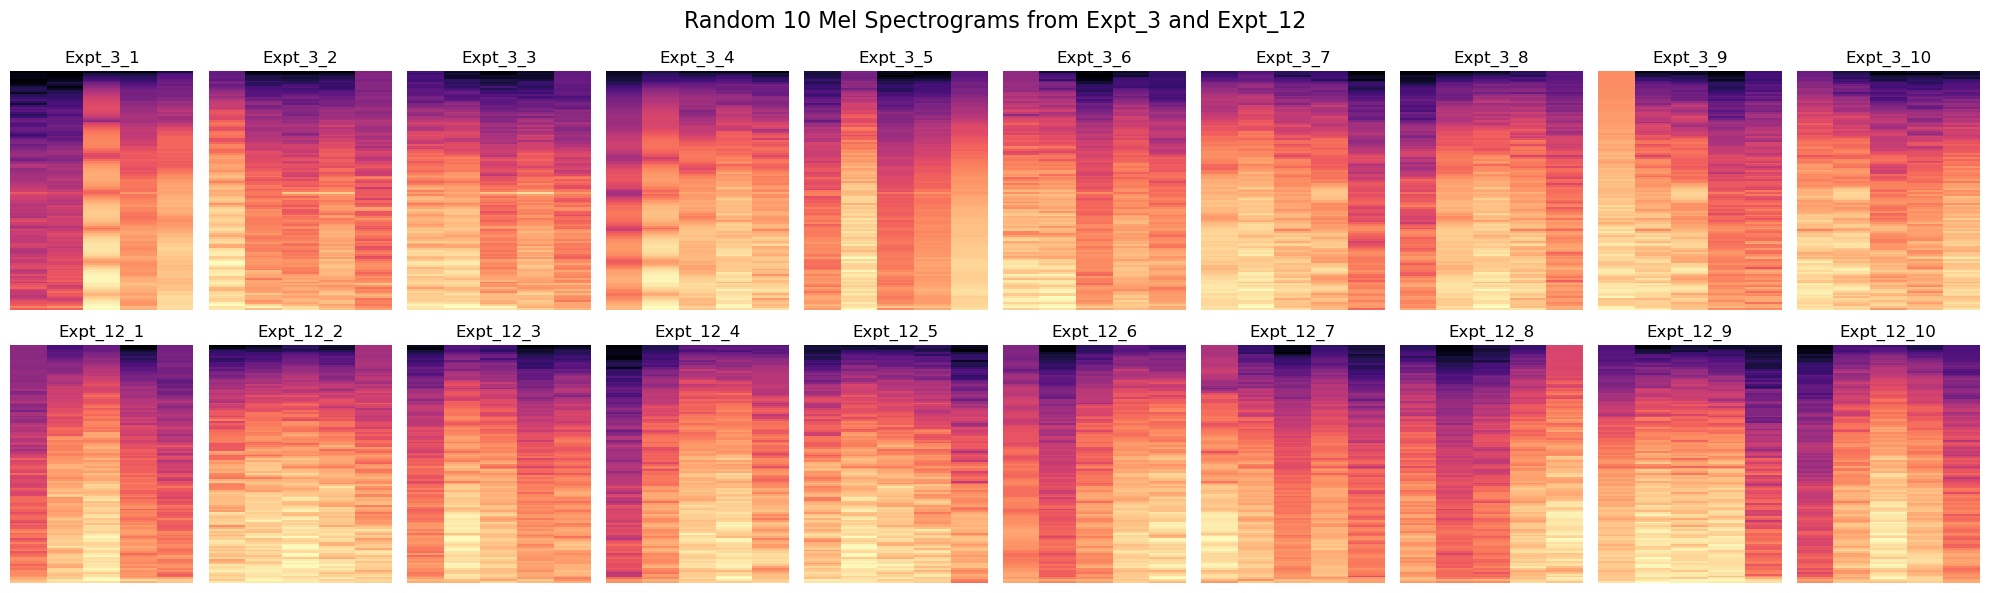

In [22]:
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import random

# === ✅ 설정 ===
data_dir = "/home/crois-times/timeseries/projects/tool_wear_havard/data/dataverse_files/Dataset/T1/Acoustic_Emission_Data"
num_splits = 10  # 무작위로 10개만 생성하여 시각화
window_size = 1000  # STFT 윈도우 크기
desired_length = 2048  # 보간 후 신호 길이
sr = 1000  # 샘플링 레이트
n_fft = 1000  # FFT 크기
hop_length = 512  # STFT hop 크기
n_mels = 128  # Mel 필터 개수
fmax = 500  # 저주파 강조

# === ✅ Mel Spectrogram 변환 함수 ===
def generate_mel_spectrogram(signal, sr=1000, n_fft=1000, hop_length=512, n_mels=128, fmax=500):
    """Mel Spectrogram 변환 (저주파 강조)"""
    mel_spec = librosa.feature.melspectrogram(y=signal, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, fmin=0, fmax=fmax)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.min)  # 약한 신호도 강조
    return mel_spec_db

# === ✅ Expt_3과 Expt_12에서 무작위 10개 생성 ===
fig, axes = plt.subplots(2, 10, figsize=(20, 6))

for row_idx, expt_idx in enumerate([3, 12]):  # Expt_3, Expt_12 처리
    file_path = os.path.join(data_dir, f"Expt_{expt_idx}.csv")
    
    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    # 무작위 시작점 선택 (겹치지 않도록 설정)
    start_indices = random.sample(range(0, len(df) - window_size), num_splits)
    
    for col_idx, start in enumerate(start_indices):
        # 슬라이싱
        df_split = df.iloc[start : start + window_size].reset_index(drop=True)
        
        # 신호 데이터 (첫 번째 컬럼 사용)
        signal = df_split.iloc[:, 0].values
        
        # 보간 적용 (길이 맞추기)
        x_original = np.linspace(0, 1, len(signal))
        x_new = np.linspace(0, 1, desired_length)
        interpolator = interp1d(x_original, signal, kind='linear')
        signal_interpolated = interpolator(x_new)
        
        # Mel Spectrogram 변환
        melspec_db = generate_mel_spectrogram(signal_interpolated, sr, n_fft, hop_length, n_mels, fmax)
        
        # 시각화
        librosa.display.specshow(melspec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', ax=axes[row_idx, col_idx])
        axes[row_idx, col_idx].set_title(f"Expt_{expt_idx}_{col_idx+1}")
        axes[row_idx, col_idx].axis("off")

plt.suptitle("Random 10 Mel Spectrograms from Expt_3 and Expt_12", fontsize=16)
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

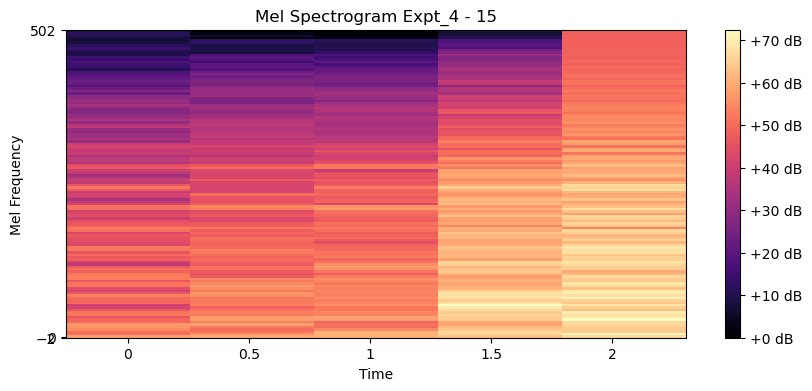

In [20]:
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# === ✅ 설정 ===
data_dir = "/home/crois-times/timeseries/projects/tool_wear_havard/data/dataverse_files/Dataset/T1/Acoustic_Emission_Data"
output_dir = "JJ/Harvard_Multimodal/Mel_spectrogram/T1"
num_splits = 540  # 생성할 Mel Spectrogram 개수
window_size = 1000  # STFT 윈도우 크기
desired_length = 2048  # 보간 후 신호 길이
sr = 1000  # 샘플링 레이트 (1000Hz, 동일한 조건 유지)
n_fft = 1000  # FFT 크기 (조건 유지)
hop_length = 512  # STFT hop 크기
n_mels = 128  # Mel 필터 개수
fmax = 500  # 저주파 강조 (고주파 영향 줄이기)

# 출력 폴더 생성
os.makedirs(output_dir, exist_ok=True)

# === ✅ Mel Spectrogram 변환 함수 ===
def generate_mel_spectrogram(signal, sr=1000, n_fft=1000, hop_length=512, n_mels=128, fmax=500):
    """Mel Spectrogram 변환 (저주파 강조)"""
    mel_spec = librosa.feature.melspectrogram(y=signal, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, fmin=0, fmax=fmax)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.min)  # 약한 신호도 강조
    return mel_spec_db

# === ✅ Expt_1~Expt_12 반복 ===
image_index = 1  # 전체 이미지 번호
for expt_idx in range(1, 13):  # Expt_1 ~ Expt_12
    file_path = os.path.join(data_dir, f"Expt_{expt_idx}.csv")
    
    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    # Stride 계산 (겹치도록 자동 조정)
    stride = (len(df) - window_size) // (num_splits - 1)
    
    # 540개 Mel Spectrogram 생성
    for split_idx in range(num_splits):
        # 슬라이싱
        df_split = df.iloc[split_idx * stride : split_idx * stride + window_size].reset_index(drop=True)
        
        # 신호 데이터 (첫 번째 컬럼 사용)
        signal = df_split.iloc[:, 0].values
        
        # 보간 적용 (길이 맞추기)
        x_original = np.linspace(0, 1, len(signal))
        x_new = np.linspace(0, 1, desired_length)
        interpolator = interp1d(x_original, signal, kind='linear')
        signal_interpolated = interpolator(x_new)
        
        # Mel Spectrogram 변환
        melspec_db = generate_mel_spectrogram(signal_interpolated, sr, n_fft, hop_length, n_mels, fmax)
        
        # 시각화 및 저장
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(melspec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f"Mel Spectrogram Expt_{expt_idx} - {split_idx+1}")
        plt.xlabel("Time")
        plt.ylabel("Mel Frequency")
        
        # 파일 저장
        file_name = f"{image_index}_Expt_{expt_idx}.png"
        save_path = os.path.join(output_dir, file_name)
        plt.savefig(save_path)
        plt.close()
        
        # 이미지 인덱스 증가
        image_index += 1

print(f"Mel Spectrogram 생성 완료. 총 {image_index-1}개 이미지 저장됨.")
